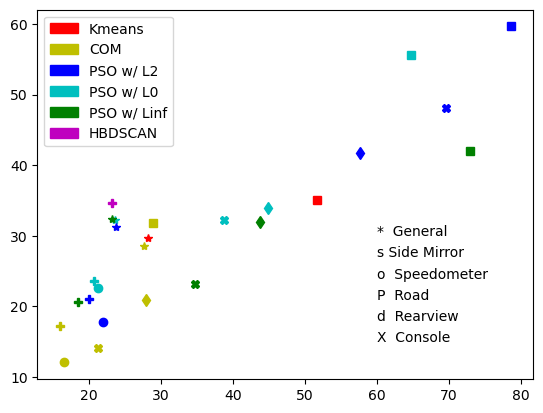

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mp

dir_list = os.listdir('clusterData')

varInfo = np.zeros(shape=(3, len(dir_list)))

for i in range(len(dir_list)):
    centroid = np.load('clusterData\\' + str(dir_list[i]))
    if len(np.where(centroid[0, :]==0)[0]) != 0:
        varInfo[:, i] = np.nan
    else:
        n = len(centroid[:, 0])
        if n == 2:
            C = np.diag(np.ones(len(centroid[0, :])))
        else:
            C = np.diag(centroid[2, :])
        
        
        dispMatr = np.ones(shape=(34))[None].T @ (centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T
        centered = centroid[:2, :] - dispMatr.T
        covar = centered @ C @ centered.T/sum(np.diag(C))
        varInfo[0, i] = np.sqrt(covar[0, 0]); varInfo[1, i] = np.sqrt(covar[1, 1])
        varInfo[2, i] = covar[0, 1]/(covar[0, 0]*covar[1, 1])

fig = plt.figure()

for i in range(34):
    if dir_list[i].split('_')[0] == 'gen':
        shape = '*'
    if dir_list[i].split('_')[0] == 'sidem':
        shape = 's'
    if dir_list[i].split('_')[0] == 'speedom':
        shape = 'o'
    if dir_list[i].split('_')[0] == 'road':
        shape = 'P'
    if dir_list[i].split('_')[0] == 'rv':
        shape = 'd'
    if dir_list[i].split('_')[0] == 'panel':
        shape = 'X'
    if dir_list[i].split('_')[1] == 'kmeans':
        color = 'r'
    if dir_list[i].split('_')[1] == 'pso':
        if dir_list[i].split('_')[2] == 'l2.npy':
            color = 'b'
        if dir_list[i].split('_')[2] == 'l0.npy':
            color = 'c'
        if dir_list[i].split('_')[2] == 'linf.npy':
            color = 'g'
    if dir_list[i].split('_')[1] == 'com.npy':
        color = 'y'
    if dir_list[i].split('_')[1] == 'hdbscan.npy':
        color = 'm'
    plt.plot(varInfo[0, i], varInfo[1, i], marker=shape, color=color)

rp = mp.Patch(color='r', label='Kmeans')
yp = mp.Patch(color='y', label='COM')
bp = mp.Patch(color='b', label='PSO w/ L2')
cp = mp.Patch(color='c', label='PSO w/ L0')
gp = mp.Patch(color='g', label='PSO w/ Linf')
magp = mp.Patch(color='m', label='HBDSCAN')
plt.legend(handles=[rp, yp, bp, cp, gp, magp], loc='upper left')

plt.text(60, 30, '*  General')
plt.text(60, 27, 's Side Mirror')
plt.text(60, 24, 'o  Speedometer')
plt.text(60, 21, 'P  Road')
plt.text(60, 18, 'd  Rearview')
plt.text(60, 15, 'X  Console')
plt.show()


Redoing the above plot but for unweighted COM

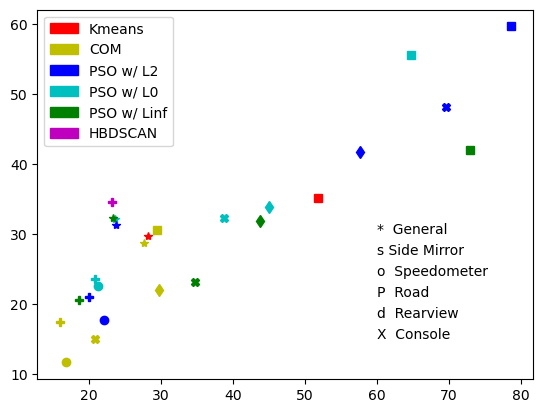

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mp

dir_list = os.listdir('clusterData')

varInfo = np.zeros(shape=(3, len(dir_list)))

for i in range(len(dir_list)):
    centroid = np.load('clusterData\\' + str(dir_list[i]))
    if len(np.where(centroid[0, :]==0)[0]) != 0:
        varInfo[:, i] = np.nan
    else:
        n = len(centroid[:, 0])
        if n == 2:
            C = np.diag(np.ones(len(centroid[0, :])))
        else:
            C = np.diag(np.ones(len(centroid[0, :])))
        
        
        dispMatr = np.ones(shape=(34))[None].T @ (centroid[:2, :] @ np.ones(shape=(34))[None].T/34).T
        centered = centroid[:2, :] - dispMatr.T
        covar = centered @ C @ centered.T/sum(np.diag(C))
        varInfo[0, i] = np.sqrt(covar[0, 0]); varInfo[1, i] = np.sqrt(covar[1, 1])
        varInfo[2, i] = covar[0, 1]/(covar[0, 0]*covar[1, 1])

fig = plt.figure()

for i in range(34):
    if dir_list[i].split('_')[0] == 'gen':
        shape = '*'
    if dir_list[i].split('_')[0] == 'sidem':
        shape = 's'
    if dir_list[i].split('_')[0] == 'speedom':
        shape = 'o'
    if dir_list[i].split('_')[0] == 'road':
        shape = 'P'
    if dir_list[i].split('_')[0] == 'rv':
        shape = 'd'
    if dir_list[i].split('_')[0] == 'panel':
        shape = 'X'
    if dir_list[i].split('_')[1] == 'kmeans':
        color = 'r'
    if dir_list[i].split('_')[1] == 'pso':
        if dir_list[i].split('_')[2] == 'l2.npy':
            color = 'b'
        if dir_list[i].split('_')[2] == 'l0.npy':
            color = 'c'
        if dir_list[i].split('_')[2] == 'linf.npy':
            color = 'g'
    if dir_list[i].split('_')[1] == 'com.npy':
        color = 'y'
    if dir_list[i].split('_')[1] == 'hdbscan.npy':
        color = 'm'
    plt.plot(varInfo[0, i], varInfo[1, i], marker=shape, color=color)

rp = mp.Patch(color='r', label='Kmeans')
yp = mp.Patch(color='y', label='COM')
bp = mp.Patch(color='b', label='PSO w/ L2')
cp = mp.Patch(color='c', label='PSO w/ L0')
gp = mp.Patch(color='g', label='PSO w/ Linf')
magp = mp.Patch(color='m', label='HBDSCAN')
plt.legend(handles=[rp, yp, bp, cp, gp, magp], loc='upper left')

plt.text(60, 30, '*  General')
plt.text(60, 27, 's Side Mirror')
plt.text(60, 24, 'o  Speedometer')
plt.text(60, 21, 'P  Road')
plt.text(60, 18, 'd  Rearview')
plt.text(60, 15, 'X  Console')
plt.show()
